<a href="https://www.kaggle.com/code/advaithdhavan/zomato-eda?scriptVersionId=248135304" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🧪 EDA Tutorial – Indian Restaurants Dataset


## Introduction
Exploratory Data Analysis (EDA) is a crucial first step in any data science or machine learning workflow. While it’s not mandatory for building models, it is highly recommended as it helps uncover patterns, detect anomalies, test assumptions, and better understand the structure of your data.

In this project, we’ll perform a detailed EDA on a dataset of Indian Restaurants sourced from Zomato (link to dataset). This guide serves as a hands-on reference for conducting basic to intermediate-level analysis, useful across many datasets.

You’ll learn how to:

Understand dataset structure and composition

Handle missing data and duplicates

Use groupby, apply, and unique effectively

Create insightful visualizations: bar charts, scatter plots, box plots, word clouds, density plots

Derive business insights from the data

Let’s dive in!

## 🗂️ Project Workflow
#### 1. Importing Libraries and Data
#### 2. Preprocessing Steps

Removing duplicates

Handling missing values

Dropping unhelpful features

#### 3. Exploratory Analysis

- ##### ✅ Restaurant Chains

- Number of outlets

- Average ratings

- ##### 🏢 Establishment Types

- Count, ratings, votes, photos

- ##### 🌆 City-Wise Analysis

- Restaurants per city

- Aggregated performance metrics

- ##### 🍱 Cuisine Insights

- Unique cuisines

- Highest-rated types

- ##### ✨ Restaurant Highlights

- Feature frequency and ratings

- WordCloud for highlights

#### 4. Cost and Rating Analysis

Rating distribution

Price range and cost comparisons

Correlation between rating, price, and votes

#### 5. 📌 Conclusion

Summarizing key insights

Suggestions for stakeholders or further modeling

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

### Preprocessing

#### Exploring data

In [2]:
data = pd.read_csv("../input/zomato/zomato_restaurants_in_India.csv")

In [3]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
data.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [5]:
data.shape

(211944, 26)

In [6]:
data.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [7]:
data.isnull().sum()


res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [8]:
data.describe()


,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [9]:
data[data["city"]=="Mumbai"]


,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
134852,18562340,Drinkery 51,['Casual Dining'],https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,4,Rs.,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1
134853,34757,Joey's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.5,Excellent,7932,4960,0.0,-1,-1
134854,18548172,Hitchki,['Bar'],https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,3,Powai,19.119930,72.907331,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.7,Excellent,3762,12979,0.0,1,-1
134855,18392725,Tamasha,['Lounge'],https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,3,Lower Parel,19.006060,72.827496,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.7,Excellent,4979,16595,0.0,-1,-1
134856,18962112,Bayroute,['Fine Dining'],https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,3,Juhu,19.110684,72.825368,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.9,Excellent,706,2484,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,[],https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,3,Powai,19.124284,72.914877,...,1,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.0,Very Good,726,703,0.0,1,-1
142349,37750,Faasos,['Quick Bites'],https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1
142350,18165909,Charcoal Eats Express,['Quick Bites'],https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,3,Lower Parel,19.002537,72.829391,...,2,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'St...",4.0,Very Good,491,344,0.0,-1,-1
142351,18306481,Wok Express,['Food Court'],https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,3,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Mall Parki...",3.7,Good,515,490,0.0,-1,-1


In [10]:
data[data["city"]=="Pune"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,['Fine Dining'],https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,['Lounge'],https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,['Fine Dining'],https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,['Fine Dining'],https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,['Fine Dining'],https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168659,13061,Lonavla Restaurant & Bar- Hotel Lonavla,['Casual Dining'],https://www.zomato.com/pune/lonavla-restaurant...,"Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune",Pune,5,Lonavala,18.754747,73.405682,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.3,Very Good,474,81,0.0,-1,-1
168660,18555341,Utopia,['Casual Dining'],https://www.zomato.com/pune/utopia-lonavala?ut...,"CTS 159, Old Mumbai-Pune Road, Lonavala, Pune",Pune,5,Lonavala,18.754342,73.402737,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,336,204,0.0,-1,-1
168661,18767059,Mapro Garden,['Casual Dining'],https://www.zomato.com/pune/mapro-garden-lonav...,"3 & 4, Old Mumbai - Pune Highway, Valvan, Lona...",Pune,5,Lonavala,18.760234,73.419775,...,2,Rs.,"['Dinner', 'Takeaway Available', 'No Alcohol A...",4.3,Very Good,143,227,0.0,-1,-1
168662,6503906,Hotel Chandralok,['Casual Dining'],https://www.zomato.com/pune/hotel-chandralok-l...,"Near Bus Stand & Post Office, Opposite Mumbai-...",Pune,5,Lonavala,18.753223,73.405655,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.3,Very Good,317,86,0.0,-1,-1


In [11]:
data[data["city"]=="Bangalore"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
19630,18627369,Biergarten,['Pub'],https://www.zomato.com/bangalore/biergarten-ko...,"4th B Cross, Koramangala 5th Block, Bangalore",Bangalore,4,Koramangala 5th Block,12.933427,77.614384,...,4,Rs.,"['Credit Card', 'Dinner', 'Cash', 'Takeaway Av...",4.9,Excellent,3632,2261,0.0,-1,-1
19631,18706428,Byg Brewski Brewing Company,['Microbrewery'],https://www.zomato.com/bangalore/byg-brewski-b...,"22/123, Byrathi Village, Bidarahalli Hobli, He...",Bangalore,4,Hennur,13.070670,77.652806,...,3,Rs.,"['Dinner', 'Cash', 'Lunch', 'Credit Card', 'De...",4.7,Excellent,7262,3000,0.0,1,-1
19632,18782265,The Bangalore Cafe,['Casual Dining'],https://www.zomato.com/bangalore/the-bangalore...,"4, KH Road, Double Road, Shanti Nagar, Bangalore",Bangalore,4,Shanti Nagar,12.961648,77.594516,...,2,Rs.,"['Dinner', 'Takeaway Available', 'Debit Card',...",4.6,Excellent,884,1183,0.0,1,-1
19633,18811668,Stories - The Brew Chapter,['Bar'],https://www.zomato.com/bangalore/stories-the-b...,"348/1/2, Survey 62, 29th Main, 2nd Stage, Lake...",Bangalore,4,BTM,12.905777,77.608377,...,4,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'De...",4.8,Excellent,670,661,0.0,-1,-1
19634,57833,Big Pitcher,['Pub'],https://www.zomato.com/bangalore/big-pitcher-a...,"4121, LR Arcade, Old Airport Road, Bangalore",Bangalore,4,Old Airport Road,12.960138,77.646924,...,3,Rs.,"['Lunch', 'Takeaway Available', 'Dinner', 'Cas...",4.8,Excellent,10652,6179,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24596,18765637,B Bhagat Tarachand,['Casual Dining'],https://www.zomato.com/bangalore/b-bhagat-tara...,"501, 5th Floor, Chickpet Plaza, Chikpet Main R...",Bangalore,4,City Market,12.969040,77.577016,...,2,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'Ta...",4.2,Very Good,244,93,0.0,-1,-1
24597,18543656,Polar Bear,['Dessert Parlour'],https://www.zomato.com/bangalore/polar-bear-el...,"16, Neeladri Road, Karuna Nagar, Phase 1, Elec...",Bangalore,4,Electronic City,12.841832,77.645891,...,1,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.2,Very Good,184,143,0.0,1,-1
24598,56630,Polar Bear,['Dessert Parlour'],https://www.zomato.com/bangalore/polar-bear-1-...,"722, 16th A Main, Opposite Sheshadripuram Coll...",Bangalore,4,Yelahanka,13.099347,77.589340,...,1,Rs.,"['Credit Card', 'Takeaway Available', 'Cash', ...",4.2,Very Good,209,149,0.0,1,-1
24599,18891234,Breads and Banter,['Café'],https://www.zomato.com/bangalore/breads-and-ba...,"620, 1st Main Road, C Block, AECS Layout, Broo...",Bangalore,4,Brookefield,12.964297,77.716808,...,1,Rs.,"['Takeaway Available', 'Breakfast', 'Cash', 'C...",4.4,Very Good,165,177,0.0,-1,-1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [13]:
data[data["average_cost_for_two"]==3000]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
108,3400080,Paatra - Jaypee Palace Hotel,['Fine Dining'],https://www.zomato.com/agra/paatra-jaypee-pala...,"Jaypee Palace Hotel, Fatehabad Road, Tajganj, ...",Agra,34,"Jaypee Palace Hotel, Tajganj",27.154347,78.071158,...,4,Rs.,"['Credit Card', 'Serves Alcohol', 'Dinner', 'A...",4.2,Very Good,140,53,0.0,-1,-1
109,3400580,Oasis - Four Points By Sheraton,['Fine Dining'],https://www.zomato.com/agra/oasis-four-points-...,"Four Points By Sheraton, C-1 & C-2, Taj Nagri ...",Agra,34,"Four Points by Sheraton Agra, Tajganj",27.158653,78.053944,...,4,Rs.,"['Dinner', 'Lunch', 'Debit Card', 'Serves Alco...",4.3,Very Good,46,86,0.0,-1,-1
110,3400932,Palato - All Day Dining - Radisson Blu,['Casual Dining'],https://www.zomato.com/agra/palato-all-day-din...,"Radisson Blu, Taj East Gate Road, Tajganj, Agra",Agra,34,"Radisson Blu, Tajganj",27.162652,78.056405,...,4,Rs.,"['Cash', 'Lunch', 'Dinner', 'Debit Card', 'Cre...",4.1,Very Good,37,48,0.0,-1,-1
111,3400412,North 27,['Fine Dining'],https://www.zomato.com/agra/north-27-tajganj?u...,"DoubleTree By Hilton, BH-1 & 2, Taj Nagri Phas...",Agra,34,"DoubleTree by Hilton Hotel Agra, Tajganj",0.000000,0.000000,...,4,Rs.,"['Credit Card', 'Breakfast', 'Dinner', 'Lunch'...",3.9,Good,20,26,0.0,-1,-1
112,3400108,The Bar - The Oberoi Amarvilas,['Fine Dining'],https://www.zomato.com/agra/the-bar-the-oberoi...,"The Oberoi Amarvilas, Taj East Gate Road, Fate...",Agra,34,"The Oberoi Amarvilas, Tajganj",27.167958,78.048769,...,4,Rs.,"['Lunch', 'Credit Card', 'Debit Card', 'Dinner...",3.8,Good,19,18,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198640,18043174,Aangan - The LaLiT Laxmi Vilas Palace,['Casual Dining'],https://www.zomato.com/AanganUdaipur?utm_sourc...,"The Lalit Laxmi Vilas Palace, Opposite Fateh S...",Udaipur,11054,The LaLiT Laxmi Vilas Palace,24.593875,73.682600,...,4,Rs.,"['Debit Card', 'Dinner', 'Credit Card', 'Cash'...",4.0,Very Good,66,28,0.0,-1,-1
199261,18043175,Sunset Terrace,['Fine Dining'],https://www.zomato.com/udaipur/sunset-terrace-...,"Fateh Prakash Palace, City Palace, City Centre...",Udaipur,11054,City Centre,24.578420,73.683716,...,4,Rs.,"['Credit Card', 'Debit Card', 'Lunch', 'Dinner...",3.9,Good,123,41,0.0,-1,-1
199280,18041463,Padmini - The LaLiT Laxmi Vilas Palace,['Casual Dining'],https://www.zomato.com/PadminiUdaipur?utm_sour...,"The Lalit Laxmi Vilas Palace, Opposite Fateh S...",Udaipur,11054,The LaLiT Laxmi Vilas Palace,24.593865,73.682559,...,4,Rs.,"['Cash', 'Lunch', 'Debit Card', 'Serves Alcoho...",3.7,Good,68,29,0.0,-1,-1
199936,18043175,Sunset Terrace,['Fine Dining'],https://www.zomato.com/udaipur/sunset-terrace-...,"Fateh Prakash Palace, City Palace, City Centre...",Udaipur,11054,City Centre,24.578420,73.683716,...,4,Rs.,"['Credit Card', 'Debit Card', 'Lunch', 'Dinner...",3.9,Good,123,41,0.0,-1,-1


In [14]:
data.drop_duplicates(["res_id"],keep='first',inplace=True)
data.shape

(55568, 26)

Data Cleaning Update:
We discovered that approximately ****75%**** of our dataset consisted of duplicate records.
Thankfully, we addressed this early in the process. 
Despite the reduction, we still have over **55,000** unique restaurant entries—more than sufficient for meaningful analysis.


Next Step: ****Handling Missing Values****
Let’s now examine which variables have missing data.

In [15]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

We identified **5 variables** with missing values. Among them, the `zipcode` feature has approximately **80% missing data**, making it unreliable for analysis—so we’ll exclude it from further consideration.

For the remaining **4 features**, we can consider **imputation**. However, before investing effort into filling missing values, we’ll evaluate whether these features are even necessary for our analysis.

### 🔍 Feature Evaluation: Omit or Keep?

Let’s examine the remaining features individually:

- `res_id`:
This is a unique identifier for each restaurant. Since it's not useful for analysis or modeling, we can safely **exclude** it.

- `name`:
This feature is **important**. We’ll use it to identify and highlight **top restaurants**, so it should be **retained**.

- `establishment`:
Let's explore the values in this column to assess its **variety and relevance** to our objectives. If the distribution is meaningful (e.g., cafe, fine dining, quick bites), it could provide useful segmentation

Out of 5 columns with missing values, `zipcode` has about **80%** missing data, so we’ll skip it.

For the other 4, we’ll first check if they’re even useful. If not, no need to waste time fixing them.

Here’s the plan:

- **`res_id` is just an ID—skip.**

- **`name` helps us find top restaurants—keep.**

- **`establishment` could be useful—let’s check the values and decide.**

In [16]:
data["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [17]:
print(data["establishment"].unique()[0])
print(type(data["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


The `establishment` column appears to be a valuable feature for exploratory data analysis. However, its current format includes unwanted characters such as **square brackets (`[]`) and quotes (`''`)**, which add noise to the data.

To clean this up, we’ll use the `apply()` function to strip out these characters. Additionally, one of the values is an empty string (`""`), which we’ll replace with `"NA"` to avoid ambiguity during analysis.

In [18]:
# Removing [' '] from each value
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

# Changing ''  to 'NA'
print(data["establishment"].unique())
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(data["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


- `url`:
This column contains links to individual restaurant pages. Since it doesn’t contribute any analytical value and is unlikely to be used in our visualizations or modeling, we will **drop it**.

- `address`:
While detailed, this column contains lengthy unstructured text that can be difficult to standardize or categorize. Unless we plan to perform text analysis or geocoding, it's best to **exclude** it from our analysis.

- `city`:
This could be an **important feature** for geographical segmentation or city-level insights.
Let’s explore the unique values in the `city` column to check for duplicates, inconsistencies, or sparsely populated categories.

In [19]:
len(data[data["city"]=="Shimla"])

218

In [20]:
len(data[data["city"]=="Agra"])

833

In [21]:
len(data["city"].unique())

99

In [22]:
data["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [23]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [24]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [25]:
data[data["city"]=="Jabalpur"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
82579,18746666,RH Chicken Point,Quick Bites,https://www.zomato.com/jabalpur/rh-chicken-poi...,"Main Road, Sadar Bazaar, Cantt, Jabalpur",Jabalpur,11336,Cantt,23.154664,79.951015,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",4.5,Excellent,680,24,0.0,-1,-1
82580,18745503,Naidu's Dilli Ki Gali Parathe Wali,Quick Bites,https://www.zomato.com/jabalpur/naidus-dilli-k...,"Near Mahakaushal Chamber Bhawan, Marhathal, Ci...",Jabalpur,11336,Napier Town,23.169057,79.933869,...,1,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'No Al...",4.7,Excellent,355,14,0.0,1,-1
82581,18815413,Riyaz Hotel - 1953,Quick Bites,https://www.zomato.com/jabalpur/riyaz-hotel-19...,"993, Badi Omti, Napier Town, Jabalpur",Jabalpur,11336,Napier Town,23.170673,79.937920,...,2,Rs.,"['Lunch', 'Takeaway Available', 'No Alcohol Av...",4.2,Very Good,542,9,0.0,-1,-1
82582,18746285,Badkul Restaurant,Casual Dining,https://www.zomato.com/jabalpur/badkul-restaur...,"103-105, Deendayal Chowk, Opposite ISBT, ITI R...",Jabalpur,11336,Vijay Nagar,23.193550,79.913353,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Cash', 'Ta...",4.0,Very Good,451,19,0.0,1,-1
82583,18825615,Popular Fresh Momos And More,Quick Bites,https://www.zomato.com/jabalpur/popular-fresh-...,"Home Science College Road, Napier Town, Jabalpur",Jabalpur,11336,Wright Town,23.160413,79.925240,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'No Al...",4.1,Very Good,249,43,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85087,18890729,Muskan Family Restaurant,Casual Dining,https://www.zomato.com/jabalpur/muskan-family-...,"Civic Center, Near Bata Showroom, Marhataal, C...",Jabalpur,11336,Civil Lines,23.167616,79.932721,...,1,Rs.,"['Dinner', 'Cash', 'Lunch', 'Takeaway Availabl...",0.0,Not rated,3,0,0.0,-1,-1
85088,18859783,Pawar's South Indian & Chines Food,Casual Dining,https://www.zomato.com/jabalpur/pawars-south-i...,"Shop No. 34, Ganjipura Chowk, Ganjipura, Jabal...",Jabalpur,11336,Cantt,23.173200,79.931319,...,1,Rs.,['Cash'],0.0,Not rated,2,0,0.0,-1,-1
85090,18859976,Swastik Restaurant,Casual Dining,https://www.zomato.com/jabalpur/swastik-restau...,"C/O Hotel Swastik, Building No 333, Napier Tow...",Jabalpur,11336,Cantt,23.162786,79.936645,...,1,Rs.,"['Cash', 'Credit Card', 'Debit Card']",0.0,Not rated,3,0,0.0,-1,-1
85091,18860323,Munna Yadav Bhojanalaya,Casual Dining,https://www.zomato.com/jabalpur/munna-yadav-bh...,"In Front Of Hotel Ankit, South, Civil Lines, J...",Jabalpur,11336,Cantt,23.161508,79.948811,...,1,Rs.,['Cash'],0.0,Not rated,2,0,0.0,-1,-1


Look's good.

1.city_id - We can uniquely use city name or id. So one feature is enough

2.locality - Let's see number of unique values

In [26]:
data["locality"].nunique()


3731

Although it can be an interesting feature, but since this feature has so many unique classes, we will avoid it.

1.latitude - Can be helpful while using geographic maps, but we won't be doing that here 

2.longitude - Same as above

3.zipcode - Approx 80% missing values

4.country_id - Since this dataset is for Indian restaurants, there should be just one unique id here. Let's check.

In [27]:
data["country_id"].unique()

array([1])

1. locality_verbose - Same as locality

In [28]:
data["locality_verbose"].nunique()

3910

1. cuisines - This feature has some missing values. Even though this has 9382 unique classes, we can see that each restaurant has a list of cusinies and the composition of the list is the reason why we have so many different cuisine classes. Let's check actual number of unique cuisine classes. But first we need to replace null values with a label.


In [29]:
print(data["cuisines"].nunique())
print(data["cuisines"].unique())

9382
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


Now that we have taken a deep look at our data, let's start with some EDA!

# Exploratory Data Analysis (EDA)
**Restaurant chains**

Here chains represent restaurants with more than one outlet

Chains vs Outlets

In [30]:
outlets = data["name"].value_counts()

In [31]:
outlets 

name
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: count, Length: 41100, dtype: int64

In [32]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [33]:
data.shape

(55568, 26)

In [34]:
chains

name
Domino's Pizza              399
Cafe Coffee Day             315
KFC                         204
Baskin Robbins              202
Keventers                   189
                           ... 
Santoor Restaurant            2
The Ice House                 2
Zaatar Arabic Restaurant      2
Ashok & Ashok Meat Dhaba      2
Hotel Tara                    2
Name: count, Length: 4890, dtype: int64

In [35]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %


35% of total restaurants are part of some kind of restaurant chain. Here, we should account for cases where two different retaurants might have exact same name but are not related to each other.

Top restaurant chains (by number of outlets)
Let's plot a horizontal bar graph to look at Top 10 restaurant chains. For the color scheme, we are using a list of pre-defined and selected colours to make the chart more appealing. If you want your analysis to look good visually, you should customize each and every element of your graph.

In [36]:
chains.head(10)

name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64

In [37]:
top10_chains = data["name"].value_counts()[:10].sort_values(ascending=True)

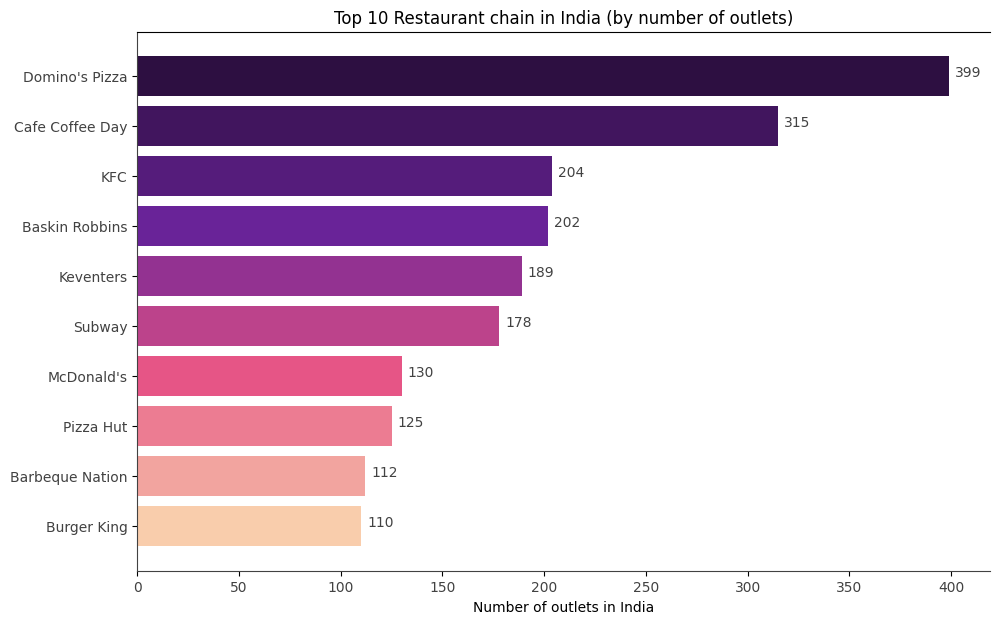

In [38]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")


colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")


plt.show()

This chart is majorly dominaed by big fast food chains

Top restaurant chains (by average rating)
Here we will look at top chains by their ratings. I have set the criteria of number of outlets to greater than 4 to remove some outliers.

In [39]:
outlets = data["name"].value_counts()

In [40]:
atleast_5_outlets = outlets[outlets > 4]

In [41]:
top10_chains2 = data[data["name"].isin(atleast_5_outlets.index)].groupby("name")["aggregate_rating"].mean().sort_values(ascending=False).head(10).sort_values()


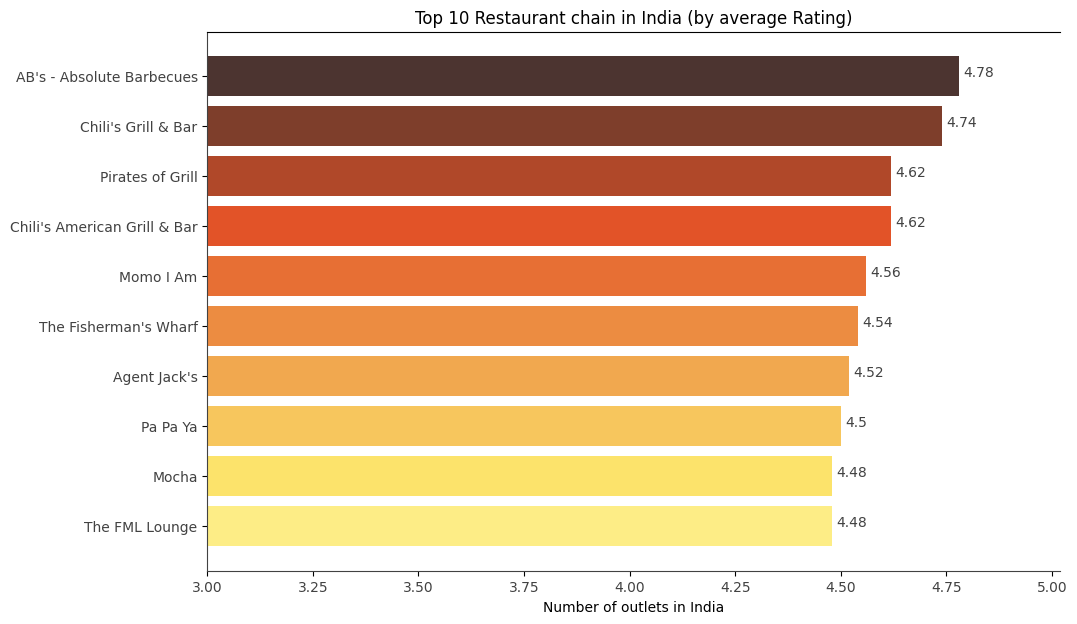

In [42]:
height = pd.Series(top10_chains2.values).map(lambda x : np.round(x, 2))
bars = top10_chains2.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")


colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by average Rating)")


plt.show()

Interestingly, no fast food chain appears in this chart. To maintain a high rating, restaurants needs to provide superior service which becomes impossible with booming 
fast food restaurant in every street.

**Establishment Types**

Number of restaurants (by establishment type)

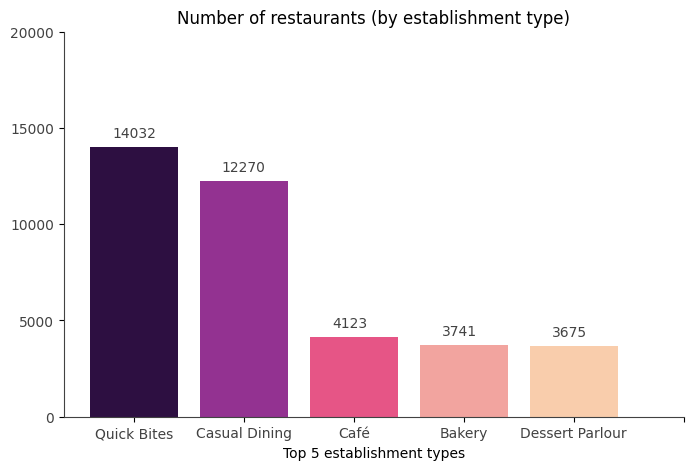

In [43]:
est_count = data.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")


colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(est_count.index, est_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()

Top 3 represents more casual and quick service restaurants, then from 4-6 we have dessert based shops.

Average rating, votes and photos (by Establishment)
Here, we will not plot each graph since it will make this notebook filled with horizontal bar charts. I see horizontal bar charts the only option to display results of this kind when we have lots of classes to compare (here 10 classes). Let's look at value_counts( ) directly

In [44]:
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,Dessert Parlour,https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,Casual Dining,https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,Casual Dining,https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


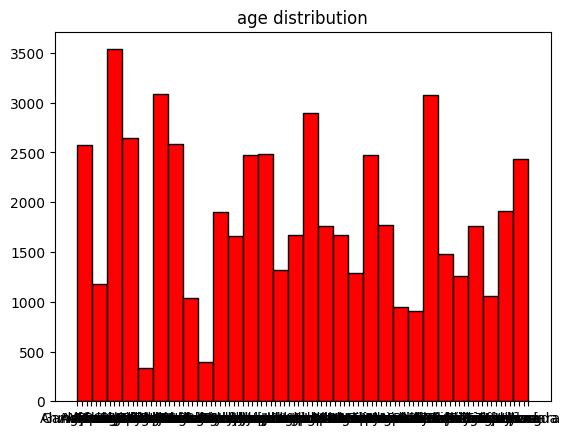

In [45]:
plt.hist(data["city"].dropna(), bins = 30, color = "red", edgecolor = "black")
plt.title("age distribution")
plt.show()

In [46]:
rating_by_est = data.groupby("establishment")["aggregate_rating"].mean().sort_values(ascending=False).head(10)
rating_by_est


establishment
Microbrewery     4.268182
Pub              3.758263
Cocktail Bar     3.531250
Fine Dining      3.436547
Lounge           3.436463
Club             3.378571
Irani Cafe       3.321429
Casual Dining    3.238680
Café             3.212345
Butcher Shop     3.110390
Name: aggregate_rating, dtype: float64

In [47]:
top10_votes_by_est = data.groupby("establishment")["votes"].mean().sort_values(ascending=False).head(10)
top10_votes_by_est


establishment
Microbrewery     1992.300000
Pub               880.274510
Bar               500.613295
Lounge            494.509756
Casual Dining     396.339935
Cocktail Bar      309.625000
Club              300.544643
Fine Dining       293.126384
Café              276.558574
Irani Cafe        178.714286
Name: votes, dtype: float64

In [48]:
top10_photos_by_est = data.groupby("establishment")["photo_count"].mean().sort_values(ascending=False).head(10)
top10_photos_by_est


establishment
Microbrewery     2042.054545
Pub               652.955182
Cocktail Bar      555.625000
Lounge            514.687805
Bar               513.321658
Fine Dining       364.817590
Café              331.935969
Casual Dining     291.550448
Irani Cafe        173.000000
Club              107.089286
Name: photo_count, dtype: float64

It can be concluded that establishments with alcohol availability have highest average ratings, votes and photo uploads.

#### Cities¶

#### Number of restaurants (by city)

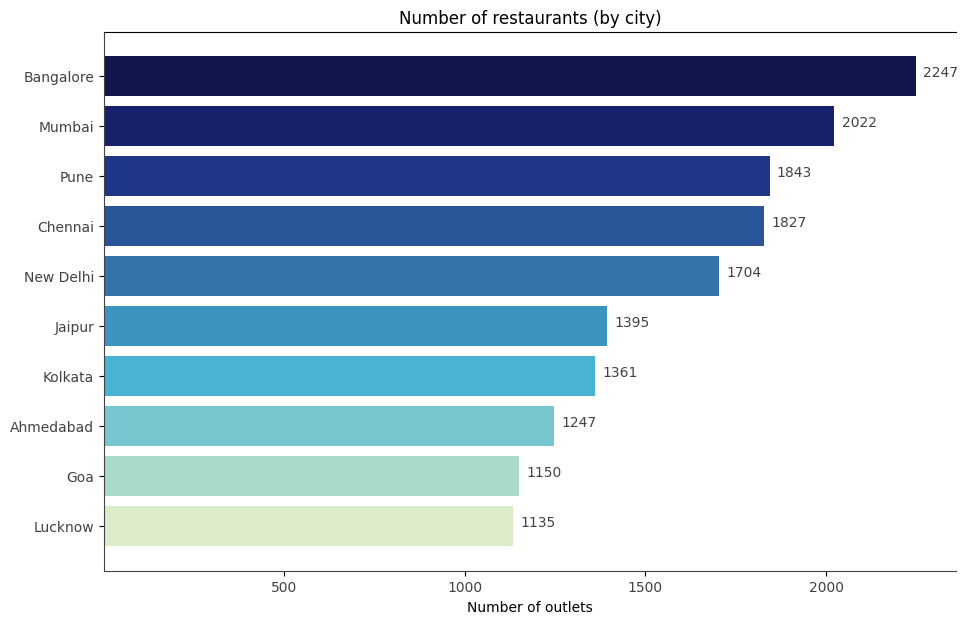

In [49]:
city_counts = data.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()

As expected, metro cities have more number of restaurants than others with South India dominating the Top 4

Average rating, votes and photos (by city)

In [50]:
rating_by_city = data.groupby("city")["aggregate_rating"].mean().sort_values(ascending=False).head(10)
rating_by_city

city
Gurgaon         3.828525
Secunderabad    3.822222
Hyderabad       3.755839
Kolkata         3.751947
New Delhi       3.727347
Mumbai          3.709298
Bangalore       3.698175
Noida           3.620307
Chennai         3.597701
Pune            3.509224
Name: aggregate_rating, dtype: float64

In [51]:
top10_votes_by_city = data.groupby("city")["votes"].mean().sort_values(ascending=False).head(10)
top10_votes_by_city


city
Hyderabad       955.549878
Secunderabad    955.433333
Mumbai          797.158259
Bangalore       724.940365
New Delhi       711.116197
Kolkata         615.706833
Gurgaon         613.180328
Noida           515.570881
Pune            475.715681
Navi Mumbai     443.342995
Name: votes, dtype: float64

In [52]:
top10_photos_by_city = data.groupby("city")["photo_count"].mean().sort_values(ascending=False).head(10)
top10_photos_by_city

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Thane          514.963855
Noida          492.291188
Bangalore      462.287939
Hyderabad      377.274939
Pune           333.320130
Name: photo_count, dtype: float64

Gurgaon has highest rated restaurants whereas Hyderabad has more number of critics. Mumbai and New Delhi dominates for most photo uploads per outlet.

**Cuisine**

**Unique cuisines**

In [53]:
print("Total number of unique cuisines = ", data["cuisines"].nunique())

Total number of unique cuisines =  9382


Number of restaurants (by cuisine)

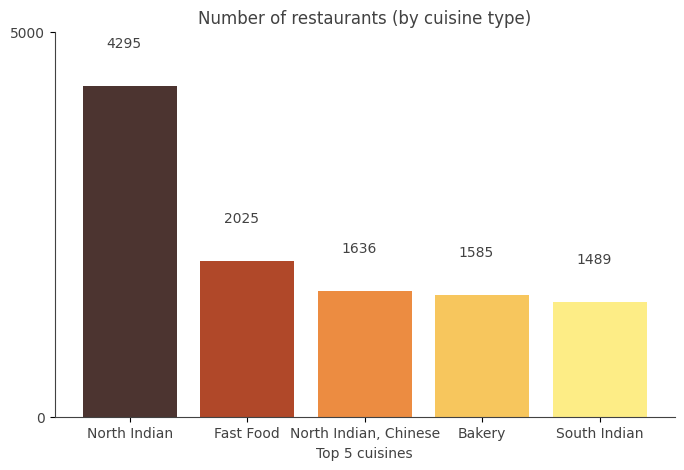

In [54]:
import matplotlib.pyplot as plt

# Extract the cuisines column
cuisines = data["cuisines"]

# Get the top 5 most common cuisines
c_count = cuisines.value_counts().head(5)

# Plotting
fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 5), c_count.index, color="#424242")
plt.yticks(range(0, max(c_count.values)+5000, 5000), color="#424242")
plt.xlabel("Top 5 cuisines", color="#424242")

for i, v in enumerate(c_count.values):
    ax.text(i-0.2, v+500, str(v), color='#424242')
    
plt.title("Number of restaurants (by cuisine type)", color="#424242")
plt.show()


Surprisingly, Fast Food comes second in the list of cuisines that Indians prefer, even more than cafe, North Indian and South Indian food.

In [55]:
import pandas as pd
import numpy as np
from collections import Counter

data["cuisines2"] = data['cuisines'].apply(lambda x: x.split(", ") if pd.notnull(x) else [])
all_cuisines = [cuisine for sublist in data["cuisines2"] for cuisine in sublist]
cuisines_list = list(set(all_cuisines))
zeros = np.zeros(shape=(len(cuisines_list), 2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum", "Total"])
cuisine_counts = Counter(all_cuisines)

for cuisine, count in cuisine_counts.items():
    c_and_r.at[cuisine, "Total"] = count
    c_and_r.at[cuisine, "Sum"] = count


In [56]:
for i, x in data.iterrows():
    for j in x["cuisines2"]:
        c_and_r.at[j, "Sum"] += x["aggregate_rating"]
        c_and_r.at[j, "Total"] += 1

In [57]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

,Sum,Total,Mean
Iranian,111.6,48.0,2.325000
South Indian,25016.3,12762.0,1.960218
Burger,8437.9,3704.0,2.278051
Maharashtrian,1806.1,1078.0,1.675417
Japanese,1364.3,538.0,2.535874
...,...,...,...
Cafe Food,19.3,8.0,2.412500
Russian,24.8,10.0,2.480000
Pan Asian,10.1,4.0,2.525000
Greek,113.5,44.0,2.579545


In [58]:
c_and_r[["Mean", "Total"]].sort_values(by="Mean", ascending=False).head(10)

,Mean,Total
Egyptian,2.708333,12.0
Poké,2.675000,24.0
Fusion,2.675000,4.0
International,2.650000,2.0
Tex-Mex,2.646970,66.0
Singaporean,2.643750,32.0
Moroccan,2.629167,24.0
Sushi,2.603043,230.0
Greek,2.579545,44.0
Mediterranean,2.565138,654.0


We can ignore a few cuisines in this list since they are available in less number. But the overall conclusion which can be drawn is that International (and rarely available) cuisines are rated higher than local cuisines.

### Highlights/Features of restaurants

#### Unique highlights

In [59]:
hl = pd.Series([item for sublist in data["highlights"].dropna().apply(lambda x: x.split(", ")) for item in sublist])
print("Top highlights of restaurants:")
print(hl.value_counts().head(10))

Top highlights of restaurants:
'Cash'                  39935
'Takeaway Available'    39752
'Indoor Seating'        30168
'Lunch'                 27312
'Dinner'                25402
'Credit Card'           24783
'Debit Card'            24051
'Delivery'              19761
'Air Conditioned'       16680
['Dinner'               12016
Name: count, dtype: int64


In [60]:
print("Total number of unique cuisines = ", hl.nunique())

Total number of unique cuisines =  244


#### Number of restaurants (by highlights)

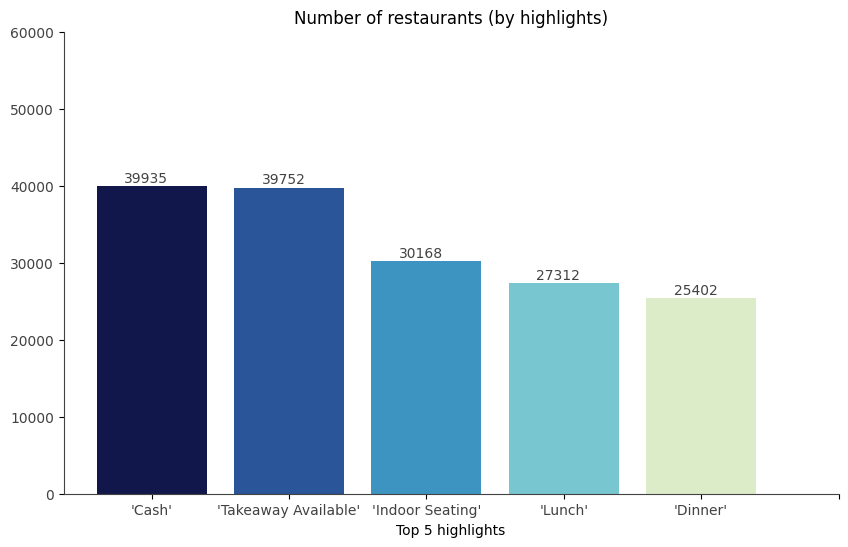

In [61]:
h_count = hl.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')

plt.title("Number of restaurants (by highlights)")
plt.show()

Top 5 highlights doesn't convey much information since they are very trivial to almost every restaurant. Let's look at uncommon highlights that matter more to the customers.

**Highest rated highlights**

In [62]:
data["highlights"][0]

"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [63]:
data["highlights2"] = data['highlights'].apply(lambda x : x[2:-2].split("', '"))

hl_list = hl.unique().tolist()
zeros = np.zeros(shape=(len(hl_list),2))
h_and_r = pd.DataFrame(zeros, index=hl_list, columns=["Sum","Total"])

In [64]:
data["highlights2"] = data["highlights"].apply(lambda x: x.split(", ") if pd.notnull(x) else [])

all_highlights = [item for sublist in data["highlights2"] for item in sublist]

highlights_list = list(set(all_highlights))

import numpy as np
h_and_r = pd.DataFrame(np.zeros((len(highlights_list), 2)), index=highlights_list, columns=["Sum", "Total"])


In [65]:
for i, x in data.iterrows():
    for j in x["highlights2"]:
        if j in h_and_r.index:
            h_and_r.at[j, "Sum"] += x["aggregate_rating"]
            h_and_r.at[j, "Total"] += 1


In [66]:
h_and_r["Mean"] = h_and_r["Sum"] / h_and_r["Total"]
h_and_r

,Sum,Total,Mean
'Bira 91 Beer',8.0,2.0,4.000000
'Resto Bar',431.8,111.0,3.890090
'Seaside'],30.0,10.0,3.000000
'Credit Card',84897.6,24783.0,3.425639
'Free Parking',12783.6,3708.0,3.447573
...,...,...,...
['Takeaway Available',15737.6,5838.0,2.695718
'Sports TV'],38.3,10.0,3.830000
'Craft Beer'],32.3,9.0,3.588889
'Ticket Restaurant',586.8,152.0,3.860526


In [67]:
h_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
'Serves Alcohol'],4.600000,1.0
'Subscription Required',4.500000,1.0
'Speakeasy',4.300000,3.0
'Craft Beer',4.236691,139.0
'Gastro Pub',4.200000,64.0
'Romantic Dining',4.188722,133.0
'Gastro Pub'],4.180000,5.0
'Sneakpeek',4.148864,264.0
'Keto Options'],4.100000,8.0
['Wifi',4.100000,1.0


We can safely ignore highlights which have a frequency of less than 10 since they can be considered as outliers. Features like Gastro pub, Craft beer, Romantic dining and Sneakpeek are well received among customers.

#### Highlights wordcloud

Here we will create a wordoud of top 30 highlights

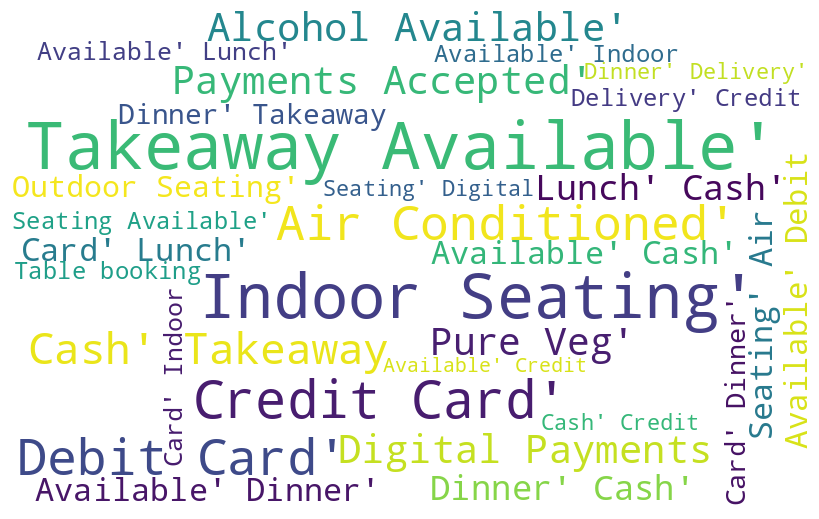

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

hl_str = " ".join(str(i) for i in hl)

wordcloud = WordCloud(width=800, height=500,
                      background_color='white',
                      min_font_size=10,
                      max_words=30).generate(hl_str)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


### Ratings and cost

#### Ratings distribution

Let's see how the ratings are distributes

/tmp/ipykernel_13/345185165.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['aggregate_rating'], shade=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


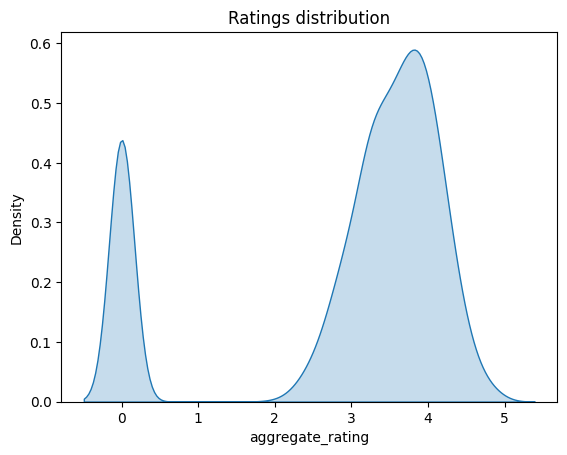

In [69]:
sns.kdeplot(data['aggregate_rating'], shade=True)
plt.title("Ratings distribution")
plt.show()


There is a huge spike at 0 which might account for newly opened or unrated restaurants. On average, majority of restaurants have rating between 3 to 4 with fewer restaurants managing to go beyond 4.

Avergae cost for two distribution

/tmp/ipykernel_13/3483524634.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['average_cost_for_two'], shade=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


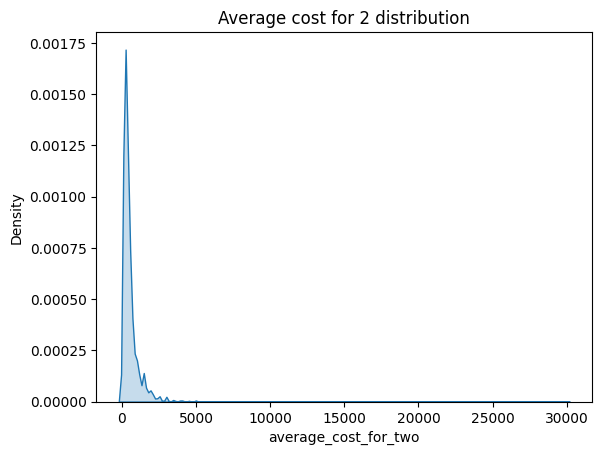

In [70]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()

With few restaurants charging average of Rs.25000+ for two, this graph is extremely skewed. Let's take a closer look at a lower range of 0 to 60000.

/tmp/ipykernel_13/1606474467.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['average_cost_for_two'], shade=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


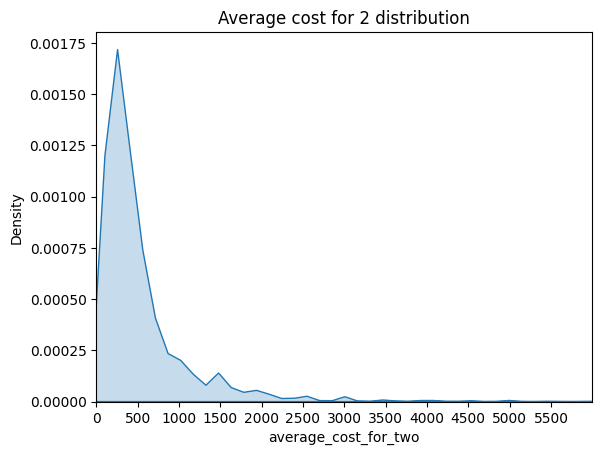

In [71]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

Majority of restaurants are budget friendly with an average cost between Rs.250 to Rs.800 for two.

Price range count

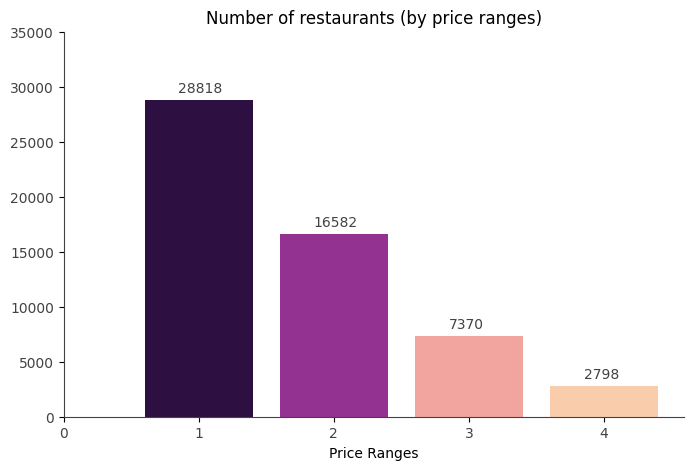

In [72]:
pr_count = data.groupby("price_range").count()["name"]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")


colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(pr_count.index, pr_count.values, color=colors)

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

for i, v in enumerate(pr_count):
    ax.text(i+0.85, v+700, str(v), color='#424242')
plt.title("Number of restaurants (by price ranges)")


plt.show()

Price range chart supports our previous observation from the Average cost chart. Number of restaurant decreases with increase in price range.

##### Relation between Average price for two and Rating¶

In [73]:
np.round(data[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)

/tmp/ipykernel_13/2753989930.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)


0.25

A correlation can be seen between restaurant average cost and rating

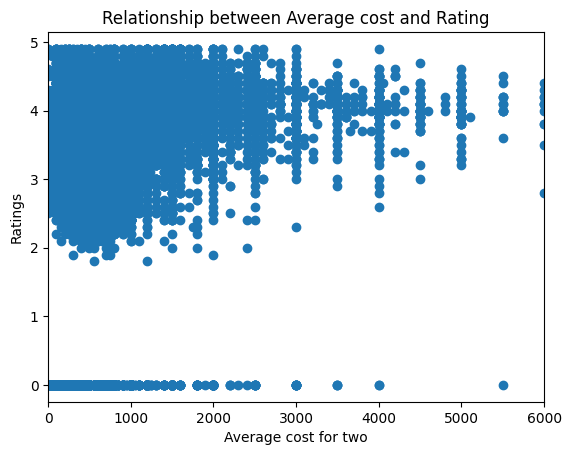

In [74]:
plt.plot("average_cost_for_two","aggregate_rating", data=data, linestyle="none", marker="o")
plt.xlim([0,6000])
plt.title("Relationship between Average cost and Rating")
plt.xlabel("Average cost for two")
plt.ylabel("Ratings")
plt.show()

There is definetely a direct relation between the two. Let's take a smaller sample to draw a clearer scatter plot.

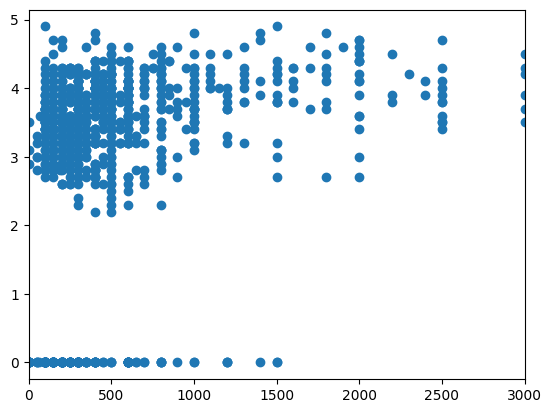

In [75]:
plt.plot("average_cost_for_two","aggregate_rating", data=data.sample(1000), linestyle="none", marker="o")
plt.xlim([0,3000])
plt.show()

This relation concludes that that as average cost for two increases, there is a better chance that the restaurant will be rated highly. Let's look at price range for a better comparison.


##### Relation between Price range and Rating

In [76]:
np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)

/tmp/ipykernel_13/3032599960.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)


0.25

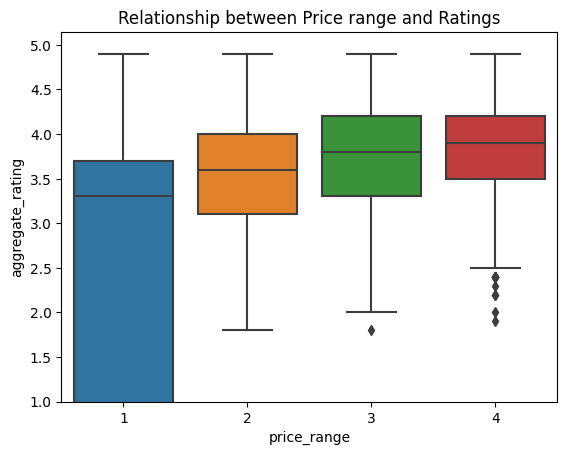

In [77]:
sns.boxplot(x='price_range', y='aggregate_rating', data=data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

Now, it is clear. The higher the price a restaurant charges, more services they provide and hence more chances of getting good ratings from their customers.

## Conclusions

 After working on this data, we can conclude the following things:-

1. Approx. 35% of restaurants in India are part of some chain
2. Domino's Pizza, Cafe Coffee Day, KFC are the biggest fast food chains in the country with most number of outlets
3. Barbecues and Grill food chains have highest average ratings than other type of restaurants
4. Quick bites and casual dining type of establishment have most number of outlets
5. Establishments with alcohol availability have highest average ratings, votes and photo uploads
6. Banglore has most number of restaurants
7. Gurgaon has highest rated restaurants (average 3.83) whereas Hyderabad has more number of critics (votes). Mumbai and New Delhi dominates for most photo uploads per outlet
8. After North Indian, Chinese is the most prefered cuisine in India
9. International cuisines are better rated than local cuisines
10. Gastro pub, Romantic Dining and Craft Beer features are well rated by customers
11. Most restaurants are rated between 3 and 4
12. Majority of restaurants are budget friendly with average cost of two between Rs.250 to Rs.800
13. There are less number of restaurants at higher price ranges
14. As the average cost of two increases, the chance of a restaurant having higher rating increases

##### Now we have come to the end of this project, I hope you learned some new tricks.

#### Please give this notebook an upvote if you find it useful!

In [78]:
data.to_csv("zomato_final.csv")